In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
import re
import string
import math
from sklearn.feature_extraction.text import CountVectorizer

KeyboardInterrupt: 

In [2]:
data = pd.read_csv('website_classification.csv')

In [3]:
data.head()

Unnamed: 0                                        website_url  \
0           0     https://www.booking.com/index.html?aid=1743217   
1           1                   https://travelsites.com/expedia/   
2           2               https://travelsites.com/tripadvisor/   
3           3              https://www.momondo.in/?ispredir=true   
4           4  https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...   

                                cleaned_website_text Category  
0  official site good hotel accommodation big sav...   Travel  
1  expedia hotel book sites like use vacation wor...   Travel  
2  tripadvisor hotel book sites like previously d...   Travel  
3  cheap flights search compare flights momondo f...   Travel  
4  bot create free account create free account si...   Travel

In [4]:
data.columns

Index(['Unnamed: 0', 'website_url', 'cleaned_website_text', 'Category'], dtype='object')

In [34]:
data.shape

(1408, 4)

In [5]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

In [6]:
#remove unnamed: 0 columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
data.head()

website_url  \
0     https://www.booking.com/index.html?aid=1743217   
1                   https://travelsites.com/expedia/   
2               https://travelsites.com/tripadvisor/   
3              https://www.momondo.in/?ispredir=true   
4  https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...   

                                cleaned_website_text Category  
0  official site good hotel accommodation big sav...   Travel  
1  expedia hotel book sites like use vacation wor...   Travel  
2  tripadvisor hotel book sites like previously d...   Travel  
3  cheap flights search compare flights momondo f...   Travel  
4  bot create free account create free account si...   Travel

In [8]:
#Show Category column with full row
data['Category'].value_counts()


Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Photography                         93
Computers and Technology            93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Adult                               16
Forums                              16
Name: Category, dtype: int64

In [9]:
data['website_url'].unique()

array(['https://www.booking.com/index.html?aid=1743217',
       'https://travelsites.com/expedia/',
       'https://travelsites.com/tripadvisor/', ...,
       'http://www.buyeuroporn.com/',
       'http://www.analdreamhouse.com/30/03/agecheck/index.html',
       'http://www.world-sex-news.com/'], dtype=object)

In [10]:
for index, text in enumerate(data['cleaned_website_text']):
    print((index, text))

(0, 'official site good hotel accommodation big saving hotel destination worldwide browse hotel review find guarantee good price hotel budget lodging accommodation hotel hotels special offer package special weekend break city break deal budget cheap discount saving select language find deal hotel home try search connect traveller india travel talk community recommend destination flamborough boreland colvend catfield harberton warleggan inspiration trip spot winter wildlife beautiful snowy island bye bye work want spontechnaity tech drive travel vital value maximise travel homes guest love browse property type hotels apartments resorts villa cabins cottage glamping serviced apartment holiday home guest house hostels motels ryokans riads holiday park homestays campsites country house farm stay boats luxury tent self catering accommodation tiny house chapel saint leonards wuqing wuchang saint eval great rowsley instow verified review real guest work start booking follow trip finally revie

In [11]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

data['cleaned_website_text'] = data['cleaned_website_text'].apply(lambda x: expand_contractions(x))
data['cleaned_website_text'] = data['cleaned_website_text'].apply(lambda x: x.lower())
data['cleaned_website_text'] = data['cleaned_website_text'].apply(lambda x: re.sub('\w*\d\w*', ' ', x))
data['cleaned_website_text'] = data['cleaned_website_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
data['cleaned_website_text'] = data['cleaned_website_text'].apply(lambda x: re.sub(' +', ' ', x))

In [41]:
cv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
data_created_features = cv.fit_transform(data)
data_created_features = pd.DataFrame(data_created_features.toarray(), columns=cv.get_feature_names())
data_created_features.head()

category  cleaned_website_text  website_url
0         0                     0            1
1         0                     1            0
2         1                     0            0

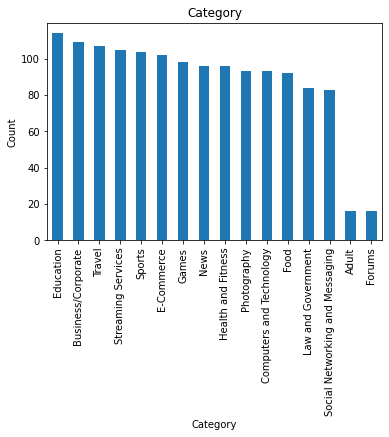

In [47]:
#plot histogram of Categiry column
data['Category'].value_counts().plot(kind='bar')
plt.title('Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


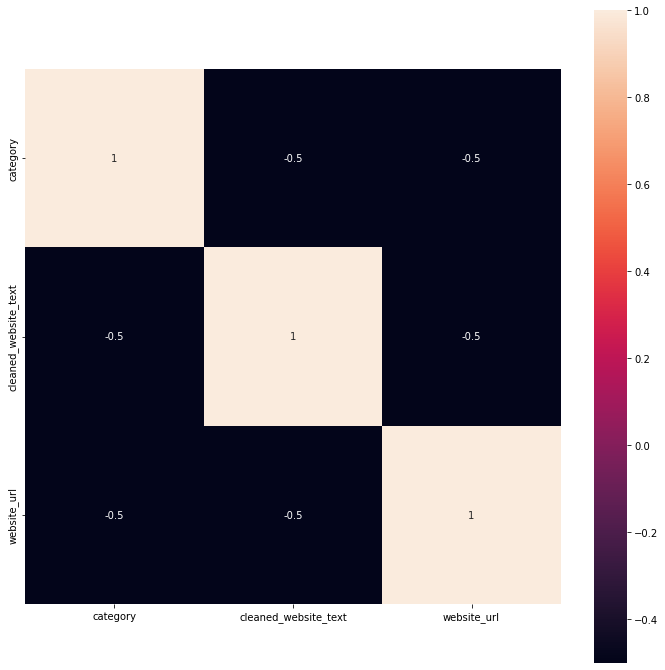

In [43]:
#plot correlation matrix
corr = data_created_features.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, square=True, annot=True)
plt.show()

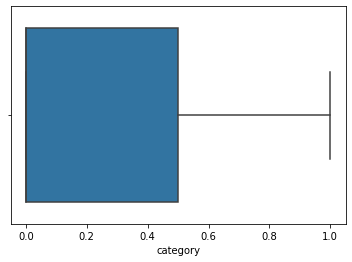

In [44]:
#plot boxplot of Category column
sns.boxplot(x='category', data=data_created_features)
plt.show()

d:\BRACU\Thesis\thesis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


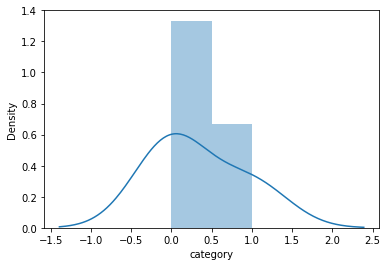

In [45]:
#plot sns histogram of Category column
sns.distplot(data_created_features['category'])
plt.show()